In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bank-additional-full-csv-r-xgb.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,Adults,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no
1,Adults,services,married,high.school,NaN,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no
2,Adults,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no
3,Adults,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no
4,Adults,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no


In [3]:
# Using One hot encoding
data1 = pd.get_dummies(data, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'])
data1.head()

,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,age_Adults,age_Senior Citizens,age_Teens,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1,0,1.1,93.994,-36.4,5191.0,no,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,1.1,93.994,-36.4,5191.0,no,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,1.1,93.994,-36.4,5191.0,no,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,1.1,93.994,-36.4,5191.0,no,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1.1,93.994,-36.4,5191.0,no,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
data1.shape

(41188, 58)

In [5]:
data1.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
# Using Label Encoding
data1['y'] = le.fit_transform(data1['y'])
data1.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [8]:
Y = data1['y']

In [9]:
X = data1.drop(columns=['y'])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [11]:
import xgboost as xgb

In [12]:
# Prepare Matrix for the model
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

In [13]:
# Default Parameter setting
xgb_param = {'booster':'gbtree', 'objective':'binary:logistic', 'eta':0.3, 'gamma':0, 'max_depth':6, 
             'min_child_weight':1, 'subsample':1, 'colsample_bytree':1, 'scale_pos_weight':1,'eval_metric':'error'}

In [14]:
# Find the best iteration using Cross Validation
xgbcv = xgb.cv(xgb_param, dtrain, num_boost_round=200, nfold=5, show_stdv=True, 
               stratified=True, early_stopping_rounds=20, maximize=False)

[13:00:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[13:00:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[13:00:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[13:00:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[13:00:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[13:00:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[13:00:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[13:00:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:00:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[13:00:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[13:00:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[13:00:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[13:00:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[13:00:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[13:00:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:00:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:00:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:00:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:00:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:00:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:00:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [15]:
print('Best iteration = {}'.format(xgbcv.shape[0]))

Best iteration = 4


In [16]:
# Model Execution with default parameters
evallist  = [(dtest,'eval'), (dtrain,'train')]
num_round = 4
xgb1 = xgb.train (xgb_param, dtrain, num_round, evals=evallist, maximize=False)

[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-error:0.100029	train-error:0.095368
[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-error:0.09867	train-error:0.095044
[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-error:0.099835	train-error:0.094623
[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[3]	eval-error:0.099932	train-error:0.094623


In [17]:
# Best Parameter setting (obtained from xgb.R)
best_param = {'booster':'gbtree', 'objective':'binary:logistic', 'eta':0.1, 'gamma':0, 'max_depth':4, 
             'min_child_weight':3.08, 'subsample':0.83, 'colsample_bytree':0.555, 'scale_pos_weight':1,'eval_metric':'error'}

In [18]:
# Model Execution with best parameters
xgb_model = xgb.train(best_param, dtrain, num_round, evals=evallist, maximize=False)

[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[0]	eval-error:0.102554	train-error:0.100385
[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[1]	eval-error:0.101874	train-error:0.100191
[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	eval-error:0.101874	train-error:0.10032
[13:00:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	eval-error:0.101389	train-error:0.100094


In [19]:
# Prediction
pred_xgb = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)

In [20]:
from sklearn.metrics import roc_curve, auc

In [21]:
fpr, tpr, threshold = roc_curve(y_test, pred_xgb)
roc_auc = auc(fpr, tpr)

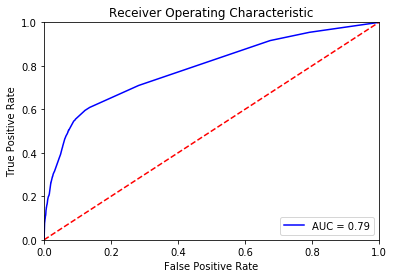

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [24]:
Find_Optimal_Cutoff(y_test, pred_xgb)

[0.3630334436893463]

In [25]:
pred_xgb_res = [1 if pred_xgb[i]>0.3630334436893463 else 0 for i in range(len(pred_xgb))]

In [26]:
fpr, tpr, threshold = roc_curve(y_test, pred_xgb_res)
roc_auc = auc(fpr, tpr)

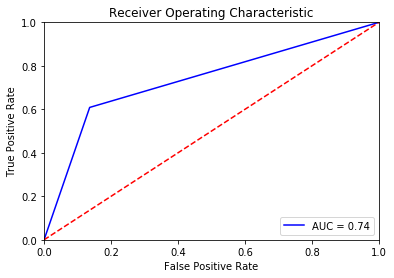

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, pred_xgb_res)

array([[7894, 1245],
       [ 453,  705]], dtype=int64)

In [30]:
# F1-score = 0.929
# Test Accuracy = 0.8351

In [31]:
import pickle
pkl_filename = "xgb_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(xgb_model, file)

In [49]:
print(dtest)